# K-Nearest-Neighbors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ML_Houses_clean.csv")
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


💡 Most features are already preprocessed (scaled with normalization), as I have already worked on this Data, for Machine learning project 

💡 One feature, `GrLiveArea`, is not normalized. Let's keep it that way to see the impact of its normalization on our model performance later on  

Let's check the min and max   

In [2]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.078410,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.813952,0.101972,0.073446,0.139100,0.246731,79442.502883
min,-2.263422,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,-0.516802,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.000000,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.483198,0.375000,0.333333,0.625000,1.000000,214000.000000
max,6.455002,1.000000,1.000000,1.000000,1.000000,755000.000000


### Default KNN

Let use cross validation to evaluate a default KNN Regressor and predict the price of houses (SalePrice).

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

X = df.drop(columns = ["SalePrice"])
y = df.SalePrice

knn_model = KNeighborsRegressor()

cv_result = cross_validate(knn_model, X, y)
base_knn_score = cv_result["test_score"].mean()

base_knn_score

0.6085640394084016

# Scale sensitivity

KNNs and distance-based algorithms can be extremely sensitive to the scale of the features. 

Let's Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`  
Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_rescaled = scaler.fit_transform(X)

cv_results = cross_validate(knn_model, X_rescaled, y)

rescaled_score = cv_results["test_score"].mean()

rescaled_score

0.6496841000103444

The R2 score has increased. It is preferable for features to be in an exact common range when modeling distance-based algorithms. However, it does not always guarantee a better score.
It is a trial and error process.

# Optimizing $k$

Now let's fine tune the parameter K (using the parameter `n_neighbors`) of a KNNRegressor on the rescaled features. We will also plot the evolution of the score as K increases from 2 until 25.

In [8]:
score = []
neighbours = []

for k in range(1,25):
    
    # Instanciate the model
    knn_model = KNeighborsRegressor(n_neighbors = k)

    # Train the model on the scaled Training data
    cv_results = cross_validate(knn_model, X_rescaled,y)

    # Append the score and k
    score.append(cv_results['test_score'].mean())
    neighbours.append(k)

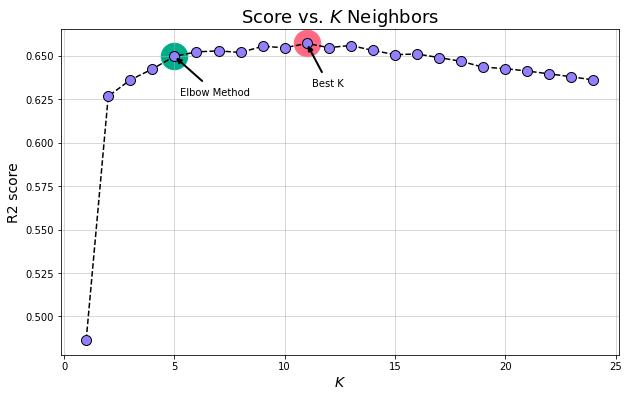

In [9]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(range(1,25),score,color='black', linestyle='dashed', marker='o',markerfacecolor='#947FFF', markersize=10)
    # more
    ax.set_title('Score vs. $K$ Neighbors', fontsize = 18)
    ax.set_xlabel('$K$', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    # best K
    # focusing
    ax.scatter(5,score[5-1],c='#00ad8b',s=700)
    ax.scatter(11,score[11-1],c='#ff6984',s=700)
    
    # annotate
    ax.annotate("Elbow Method", 
                xy=(5,score[5-1]),
                xytext=(5+0.25,score[6-1]-0.025), 
                arrowprops=dict(arrowstyle='-|>',
                                fc="k",
                                ec="k",
                                lw=2),
                bbox=dict(pad=5, facecolor="none", edgecolor="none")
               )
    
    ax.annotate("Best K", 
            xy=(11,score[11-1]),
            xytext=(11+0.25,score[11-1]-0.025), 
            arrowprops=dict(arrowstyle='-|>',
                            fc="k",
                            ec="k",
                            lw=2),
            bbox=dict(pad=5, facecolor="none", edgecolor="none")
           )

    
    plt.show()

In [11]:
cv_results = cross_validate(KNeighborsRegressor(n_neighbors=11), X_rescaled,y, scoring = 'neg_mean_absolute_error')

price_error = cv_results['test_score'].mean()

price_error

-30819.016376089665

# Model Selection

KNN model VS Linear Regression Model

In [12]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression() # Instanciate Linear Regression

cv_results_linear = cross_validate(lin_model, X_rescaled,y, scoring = 'neg_mean_absolute_error') # Cross validate

linear_model_score = cv_results_linear['test_score'].mean()  # Mean of scores

linear_model_score

-33586.16906310637

When comparing either metric of both models, the KNN model has outperformed the Linear Regression model. This could be due to its ability to capture non-linear patterns in the data.